<a id=section1></a>

# Mobile Services Usage - Capstone project

### Week 2

- Fetch the Data on to Python Notebook by connecting to the provided MySQL instance. 
- Ponder upon the challenges present in Data and list the observations.  
- Resolve the challenges that were observed in the data

<a id=section2></a>

### 1. Import libraries

In [1]:
import numpy as np                                            # Implemennts milti-dimensional array and matrices
import pandas as pd                                           # For data manipulation and analysis
import mysql.connector                                        #Connect mysql
import matplotlib.pyplot as plt                               # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                         # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline                                           
# Allow plots to appear directly in the notebook

import math 
from collections import Counter 
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings("ignore")

### 2. Load and explore the data

In [2]:
#Importing dataset using pd.read_csv
agt = pd.read_csv('D://DataBase//Telecom_Capstone//gender_age_train.csv', encoding="utf-8")
events = pd.read_csv('D://DataBase//Telecom_Capstone//events_data.csv', encoding="utf-8")
brand = pd.read_csv('D://DataBase//Telecom_Capstone//phone_brand_device_model.csv', encoding="utf-8")

In [3]:
agt.head()                                                  #Gives the first five rows of gender_age_train

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [4]:
agt.shape

(74645, 4)

In [5]:
agt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [6]:
agt.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [7]:
events.head()                                                  #Gives the first five rows of events_data

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi


In [8]:
events.shape

(3252950, 7)

In [9]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(4), object(3)
memory usage: 173.7+ MB


In [10]:
events.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [11]:
events[(events['device_id'].isnull())]

,event_id,device_id,timestamp,longitude,latitude,city,state
23808,72957.0,NaN,2016-05-03 06:10:14,77.303153,28.728888,Delhi,Delhi
23820,78897.0,NaN,2016-05-02 11:25:47,77.303153,28.728888,Delhi,Delhi
23831,94768.0,NaN,2016-05-02 17:39:12,77.303153,28.728888,Delhi,Delhi
23852,127677.0,NaN,2016-05-01 10:06:53,77.303153,28.728888,Delhi,Delhi
24093,442470.0,NaN,2016-05-07 09:03:18,77.303153,28.728888,Delhi,Delhi
...,...,...,...,...,...,...,...
3098746,1882296.0,NaN,2016-05-01 13:17:54,73.169345,21.194283,Bardoli,Gujarat
3098757,1952481.0,NaN,2016-05-05 00:53:42,73.169345,21.194283,Bardoli,Gujarat
3098801,2235564.0,NaN,2016-05-01 12:43:58,73.169345,21.194283,Bardoli,Gujarat
3098833,2452592.0,NaN,2016-05-02 13:34:20,73.169345,21.194283,Bardoli,Gujarat


In [12]:
events['device_id'].nunique()

60865

In [13]:
events['event_id'].nunique()

3252950

In [14]:
brand.head()                                                  #Gives the first five rows of phone_brand_device_model

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [15]:
brand.shape

(87726, 3)

In [16]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [17]:
brand.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

### 3. Week-1 Observations

1.  There are null/zeros in "device_id" of events_data which should not be the case.
2.	There are null/zeros in "latitude" and "longitude".
3.	Some of the "latitudes" and "longitudes" are wrong.
4.	"state" column of events_data has null values in the DataBase. Retrieve those rows and fill them appropriately.
5.	Phone brand and device models got some non-English names which need translation.


### 4. Deal with challenges present in the data

#### 4.1. Brand dataset

In [18]:
brand.info()                            #Gives index, datatype and memory info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [19]:
brand.isnull().sum()                        #Gives the null values count

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [20]:
brand['phone_brand'].nunique()             #Get the count of unique phone_brand

116

Brand dataframe includes, non-English phone brand and device models.  These need English translation for readability.  Google translator package was used and failed due to API time restriction.  Using the predefined translations provided by INSAIDTelcom.

In [21]:
#Creating a new dataframe with phone_brand count
brand_count = pd.DataFrame(list(Counter(brand['phone_brand']).items()), columns = ['phoneBrand','count'])
brand_count = brand_count.sort_values('count',ascending=False)          #Sort values per Count  
brand_count = brand_count.reset_index(drop=True)                        #Reset the index
brand_count.head(20)                                                    #View top 20 brands

,phoneBrand,count
0,小米,21645
1,三星,19211
2,华为,15181
3,vivo,7596
4,OPPO,6717
5,魅族,5531
6,酷派,3979
7,HTC,1272
8,联想,982
9,乐视,841


Top 20 brands contribute to 85,789 observations of the dataset.

In [22]:
#Translate all the Chinese names to English (which appear in the top 20)
brand = brand.replace({'华为':'Huawei'},regex=True)
brand = brand.replace({'小米':'Xiaomi'},regex=True)
brand = brand.replace({'三星':'Samsung'},regex=True)
brand = brand.replace({'魅族':'Meizu'},regex=True)
brand = brand.replace({'酷派':'Coolpad'},regex=True)
brand = brand.replace({'乐视':'LeEco'},regex=True)
brand = brand.replace({'联想':'Lenovo'},regex=True)  
brand = brand.replace({'丰米':'Fonmi'},regex=True)  
brand = brand.replace({'努比亚':'Nubia'},regex=True)
brand = brand.replace({'中国移动':'China Mobile'},regex=True)
brand = brand.replace({'锤子':'hammer'},regex=True)
brand = brand.replace({'朵唯':'Dowi'},regex=True)
brand = brand.replace({'优米':'Quality rice'},regex=True)
brand = brand.replace({'海信':'Hisense'},regex=True)
brand = brand.replace({'一加':'One plus'},regex=True)
brand = brand.replace({'奇酷':'Kiku'},regex=True)

In [23]:
brand['device_model'].nunique()          #Get the count of unique device_model

1467

In [24]:
#Creating a new dataframe with device_model count
model_count = pd.DataFrame(list(Counter(brand['device_model']).items()), columns = ['deviceModel','count'])
model_count = model_count.sort_values('count',ascending=False)          #Sort values per Count  
model_count = model_count.reset_index(drop=True)                        #Reset the index
model_count.head(10)                                                    #View top 10 model

,deviceModel,count
0,红米note,3500
1,MI 3,2739
2,MI 2S,2547
3,Galaxy Note 3,2378
4,MI 4,2256
5,Galaxy S4,1910
6,Galaxy Note 2,1877
7,荣耀6,1471
8,荣耀畅玩4X,1279
9,荣耀3C,1206


In [25]:
#Translate all the Chinese names to English (which appear in the top 50)
brand = brand.replace({'红米':'Red rice'},regex=True)
brand = brand.replace({'荣耀畅玩':'Glory play'},regex=True)
brand = brand.replace({'荣耀':'glory'},regex=True)
brand = brand.replace({'魅蓝':'Charm Blue'},regex=True)
brand = brand.replace({'增强版':'Enhanced Edition'},regex=True)
brand = brand.replace({'畅玩版':'Play Version'},regex=True)
brand = brand.replace({'大神':'Ogami'},regex=True)
brand = brand.replace({'超级手机':'Super phone'},regex=True)

#### 4.2. Age and gender dataset

In [26]:
agt.head()                       #Gives the first five rows of dataframe

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [27]:
agt.info()                                    #Gives index, datatype and memory info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [28]:
agt.isnull().sum()                           #Look for null value

device_id    0
gender       0
age          0
group        0
dtype: int64

In [29]:
agt.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [30]:
agt.group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

#### 4.3. Events dataset

Events dataset has got the customers data across the country.  Analysis requires the **focus** for six states namely **TamilNadu, Manipur, Chandigarh, Tripura, UttarPradesh and ArunachalPradesh**.

In [31]:
#Extracting the states to focus for consulting (TamilNadu, Manipur, Chandigarh, Tripura, UttarPradesh, ArunachalPradesh)
new_event = events[events['state'].isin(['TamilNadu','Manipur','Chandigarh','Tripura','UttarPradesh','ArunachalPradesh'])]

In [32]:
new_event

,event_id,device_id,timestamp,longitude,latitude,city,state
1428965,1559715.0,4.197788e+18,2016-05-07 21:54:15,80.353801,13.177924,Chennai,TamilNadu
1428966,2418233.0,4.197788e+18,2016-05-06 07:45:05,80.353801,13.177924,Chennai,TamilNadu
1428967,3038840.0,4.197788e+18,2016-05-07 22:12:15,80.353801,13.177924,Chennai,TamilNadu
1428968,1559989.0,8.121927e+17,2016-05-02 22:40:24,80.324694,13.161864,Chennai,TamilNadu
1428969,1875896.0,8.121927e+17,2016-05-02 02:03:46,80.324694,13.161864,Chennai,TamilNadu
...,...,...,...,...,...,...,...
2829970,3238143.0,-7.121363e+18,2016-05-04 15:20:16,77.703167,29.561617,Muzaffarnagar,UttarPradesh
2829973,3241114.0,3.602749e+18,2016-05-02 17:10:30,79.805795,27.992214,Tilhar,UttarPradesh
2829974,3242248.0,-2.693068e+18,2016-05-07 17:44:38,82.235358,26.857899,Faizabad,UttarPradesh
2829976,3245662.0,-8.311902e+18,2016-05-06 19:27:23,78.810885,28.496424,Chandausi,UttarPradesh


In [33]:
new_event.info()                           #Gives index, datatype and memory info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534415 entries, 1428965 to 2829977
Data columns (total 7 columns):
event_id     534415 non-null float64
device_id    534352 non-null float64
timestamp    534415 non-null object
longitude    534352 non-null float64
latitude     534352 non-null float64
city         534415 non-null object
state        534415 non-null object
dtypes: float64(4), object(3)
memory usage: 32.6+ MB


In [34]:
new_event.isnull().sum()                   # Look for null values

event_id      0
device_id    63
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

We observe that **device_id, longitude and latitude have got missing values**.  Will impute them in order to proceed with the further analysis.

#### Impute device_id

In [35]:
#Extract the logitude, latitude, city and state corresponding to missing device_id fields
empty_device_ID = new_event.loc[pd.isnull(new_event['device_id']),['longitude','latitude','city','state']].drop_duplicates()
empty_device_ID

,longitude,latitude,city,state
1585123,80.309272,13.149176,Chennai,TamilNadu
1596647,80.335435,13.189053,Chennai,TamilNadu
1648241,80.343613,13.153332,Chennai,TamilNadu


From the above, it is clear that there **three distinct geo codes** corresponding to chennai city.  With the help of these geo codes, we will populate the missing device_id.

In [36]:
def findNonEmptyDeviceDataBy(longitude, latitude, city, state):
    '''Function to extract the device_id if the geo codes, city and state match the observation being passed'''
    return new_event.loc[(new_event['city']==city) & (round(new_event['longitude'],6)==longitude) & 
                          (round(new_event['latitude'],6)==latitude) & (new_event['device_id'].notnull()),
                          ['device_id']]['device_id'].unique()

In [37]:
#Look for possible device_id matching the geo codes.
for index, row in empty_device_ID.iterrows():
    print(findNonEmptyDeviceDataBy(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state']))

[7.66213914e+18]
[7.98387143e+18]
[5.73136927e+18]


In [38]:
def createMask(longitude, latitude, city, state):
    '''Function to return the values if they match the parameters being passed'''
    return (new_event['city']==city) & (round(new_event['longitude'],6)==longitude) & (round(new_event['latitude'],6)==latitude)

In [39]:
#Impute the missing device_id
for index, row in empty_device_ID.iterrows():
    new_event.loc[(createMask(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state'])) & 
                   (new_event['device_id'].isnull()),['device_id']] = findNonEmptyDeviceDataBy(round(row['longitude'],6), round(row['latitude'],6),row['city'],row['state'])

#### Impute Longitude

In [40]:
#Extract the device_id, city and state corresponding to missing logitude fields
empty_longitude = new_event.loc[(pd.isnull(new_event['longitude'])),['device_id','city','state']].drop_duplicates()
empty_longitude

,device_id,city,state
1585119,7.662139e+18,Chennai,TamilNadu
1596643,7.983871e+18,Chennai,TamilNadu
1648237,5.731369e+18,Chennai,TamilNadu


From the above, it is clear that there **three distinct device_id** corresponding to chennai city.  With the help of these device_id, we will populate the missing longitude.

In [41]:
def findNonEmptylongitudeBy(device_id, city, state):
    '''Function to extract the longitude if the device_id, city and state match the observation being passed'''
    return new_event.loc[(new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state)
                         & (new_event['longitude'].notnull()),['longitude','latitude']].drop_duplicates()

In [42]:
#Look for possible longitude matching the device_id
for index, row in empty_longitude.iterrows():
    print(findNonEmptylongitudeBy(row['device_id'],row['city'],row['state']))

         longitude   latitude
1585066  80.309272  13.149176
         longitude   latitude
1596590  80.335435  13.189053
         longitude   latitude
1648184  80.343613  13.153332


In [43]:
def geoMask(device_id, city, state):
    '''Function to return the values if they match the parameters being passed'''
    return ((new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state) & (new_event['longitude'].isnull()))

In [44]:
#Impute the missing longitude
for index, row in empty_longitude.iterrows():
    new_event.loc[(geoMask(row['device_id'],row['city'],row['state'])) & 
                   (new_event['longitude'].isnull()),['longitude']] = findNonEmptylongitudeBy(row['device_id'],row['city'],row['state'])['longitude'].values[0]

#### Impute Latitude

In [45]:
#Extract the device_id, city and state corresponding to missing latitude fields
empty_latitude = new_event.loc[(pd.isnull(new_event['latitude'])),['device_id','city','state']].drop_duplicates()
empty_latitude

,device_id,city,state
1585119,7.662139e+18,Chennai,TamilNadu
1596643,7.983871e+18,Chennai,TamilNadu
1648237,5.731369e+18,Chennai,TamilNadu


From the above, it is clear that there **three distinct device_id** corresponding to chennai city.  With the help of these device_id, we will populate the missing latitude.

In [46]:
def findNonEmptylatitudeBy(device_id, city, state):
    '''Function to extract the latitude if the device_id, city and state match the observation being passed'''
    return new_event.loc[(new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state)
                         & (new_event['latitude'].notnull()),['longitude','latitude']].drop_duplicates()

In [47]:
def geoMaskLatitude(device_id, city, state):
    '''Function to return the values if they match the parameters being passed'''
    return ((new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state) & (new_event['latitude'].isnull()))

In [48]:
#Impute the missing latitude
for index, row in empty_latitude.iterrows():
    new_event.loc[(geoMaskLatitude(row['device_id'],row['city'],row['state'])) & 
                   (new_event['latitude'].isnull()),['latitude']] = findNonEmptylongitudeBy(row['device_id'],row['city'],row['state'])['latitude'].values[0]

In [49]:
#Check for null values after the missing value imputation
new_event.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

As the missing value imputation is completed.  Geo codes will be analyzed further to check if values are valid, non-zero and outliers.  We will get started by plotting the geo codes on the map.

In [50]:
#Extract the geo codes alone and create a dataframe for plotting them on the map
geo_df = new_event
geo_df = geo_df.groupby(["longitude", "latitude","city","state"]).size().reset_index(name="count")
geo_df.sort_values('count', ascending = False)

,longitude,latitude,city,state,count
7836,80.359796,13.128174,Chennai,TamilNadu,33405
5968,80.309010,13.114228,Chennai,TamilNadu,14555
5326,80.291743,13.145584,Chennai,TamilNadu,3791
7226,80.343613,13.153332,Chennai,TamilNadu,3534
5979,80.309272,13.149176,Chennai,TamilNadu,3506
...,...,...,...,...,...
5246,80.289487,13.188528,Chennai,TamilNadu,1
6191,80.314555,13.189403,Chennai,TamilNadu,1
5248,80.289535,13.108998,Chennai,TamilNadu,1
5249,80.289550,13.156504,Chennai,TamilNadu,1


In [51]:
geo_df.info()                #Check the dataframe fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9566 entries, 0 to 9565
Data columns (total 5 columns):
longitude    9566 non-null float64
latitude     9566 non-null float64
city         9566 non-null object
state        9566 non-null object
count        9566 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 373.8+ KB


In [52]:
base_map = folium.Map(location=[20.5937,78.9629], control_scale=True, zoom_start=5)
HeatMap(data=geo_df[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

From the map, we observe that **most users** are from **TamilNadu and UttarPradesh**. Nevertheless, it doesn't reveal any outliers. Plotting the geo codes using **scatter plot**, will aid a better identification of **outliers if any**.

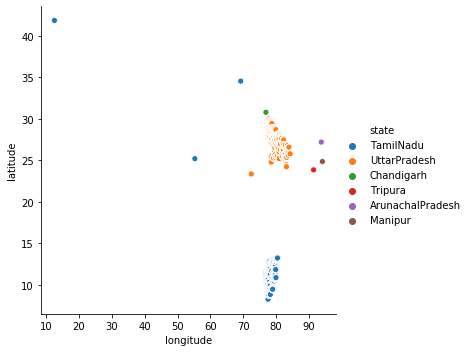

In [53]:
sns.relplot(data=geo_df, y='latitude', x='longitude', hue='state')
plt.show()

It is obvious that **TamilNadu and UttarPradesh have got some outlier values**.  Extracting them below for further analysis.

In [54]:
#Extract the outliers in TamilNadue
tn_out_data=new_event.loc[(new_event['state']=='TamilNadu') & (new_event['longitude']<75) & (new_event['latitude']>20),['longitude','latitude','city','state']].drop_duplicates()
tn_out_data

,longitude,latitude,city,state
1576980,69.2075,34.5553,Chennai,TamilNadu
1704983,55.2708,25.2048,Chennai,TamilNadu
1777732,12.5674,41.8719,Chennai,TamilNadu


In [55]:
#Extract the outliers in UttarPradesh
up_out_data=new_event.loc[(new_event['state']=='UttarPradesh') & (new_event['longitude']<73) & (new_event['latitude']<25),['longitude','latitude','city','state']].drop_duplicates()
up_out_data

,longitude,latitude,city,state
2635938,72.419673,23.397143,Kadi,UttarPradesh
2666293,72.389010,23.368421,Kadi,UttarPradesh
2681346,72.425512,23.330159,Kadi,UttarPradesh
2694334,72.365270,23.375839,Kadi,UttarPradesh
2709507,72.426837,23.346063,Kadi,UttarPradesh
2722146,72.393517,23.338049,Kadi,UttarPradesh
2731752,72.367590,23.389080,Kadi,UttarPradesh
2740130,72.394669,23.327080,Kadi,UttarPradesh
2757842,72.356246,23.390456,Kadi,UttarPradesh
2762356,72.420054,23.334427,Kadi,UttarPradesh


In [56]:
#Combine TamilNadu and UttarPradesh outlier values to create an outlier dataframe
geo_outlier=tn_out_data.append(up_out_data)
geo_outlier

,longitude,latitude,city,state
1576980,69.207500,34.555300,Chennai,TamilNadu
1704983,55.270800,25.204800,Chennai,TamilNadu
1777732,12.567400,41.871900,Chennai,TamilNadu
2635938,72.419673,23.397143,Kadi,UttarPradesh
2666293,72.389010,23.368421,Kadi,UttarPradesh
2681346,72.425512,23.330159,Kadi,UttarPradesh
2694334,72.365270,23.375839,Kadi,UttarPradesh
2709507,72.426837,23.346063,Kadi,UttarPradesh
2722146,72.393517,23.338049,Kadi,UttarPradesh
2731752,72.367590,23.389080,Kadi,UttarPradesh


In [57]:
locations = geo_outlier[['latitude','longitude']].drop_duplicates()
print(locations[locations['latitude'].isnull()].shape)
locationlist= locations.values.tolist()

(0, 2)


In [58]:
len(locationlist)

28

Plot the geo code outliers dataframe for visualize understanding of the outlier values.

In [59]:
map1 = folium.Map(location=locationlist[27], zoom_start=5)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map1)
    
map1

Above graph clearly shows that the incorrect/outlier geo locations add no value to the analysis.  It is imperative to remove these in order to get the correct insights.

In [60]:
#Drop the rows with outlier geo code values for state - TamilNadu
new_event= new_event.drop(new_event[(new_event['state']=='TamilNadu') & (new_event['longitude']<75) &
                                      (new_event['latitude']>20)].index)

In [61]:
#Drop the rows with outlier geo code values for state - UttarPradesh
new_event=new_event.drop(new_event[(new_event['state']=='UttarPradesh') & (new_event['longitude']<73) &
                                      (new_event['latitude']<25)].index)

In [62]:
geo_df=new_event[['longitude','latitude','city','state']].drop_duplicates()

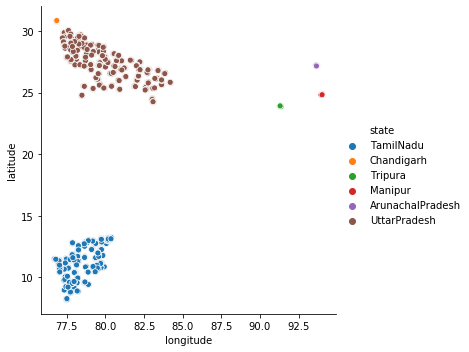

In [63]:
#Plot the filtered geo code
sns.relplot(data=geo_df, y='latitude', x='longitude', hue='state')
plt.show()

Above graph explains no more outliers.  We will move to the next step of the analysis.

In [64]:
#Check if the events dataframe is good to go.
new_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533459 entries, 1428965 to 2829977
Data columns (total 7 columns):
event_id     533459 non-null float64
device_id    533459 non-null float64
timestamp    533459 non-null object
longitude    533459 non-null float64
latitude     533459 non-null float64
city         533459 non-null object
state        533459 non-null object
dtypes: float64(4), object(3)
memory usage: 32.6+ MB


<a id=section503></a>

<a id=section5></a>